### Importing Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/swiggy_delivery_data.csv")
df.head(5)

,Order_ID,Customer_ID,Restaurant_Name,Food_Item,Quantity,Price,Order_Time,Delivery_Time,Delivery_Status,Location,Rating,Delivery_Partner
0,ORD0001,CUST119,Oven Story,Chicken Overload Pizza,2,686,2025-06-14 13:37,2025-06-14 14:20,Delivered,Mumbai,3.0,DP004
1,ORD0002,CUST384,Biryani Blues,Paneer Biryani,3,939,2025-06-10 22:57,2025-06-10 23:17,Delivered,Delhi,4.0,DP002
2,ORD0003,CUST321,Behrouz Biryani,Mutton Biryani,2,392,2025-06-01 16:29,2025-06-01 16:51,Delivered,Mumbai,4.0,DP005
3,ORD0004,CUST365,Biryani Blues,Paneer Biryani,2,320,2025-06-05 18:24,2025-06-05 18:57,Delivered,Mumbai,5.0,DP002
4,ORD0005,CUST517,Subway,Veggie Delight,1,189,2025-06-20 14:12,2025-06-20 14:51,Late,Hyderabad,NaN,DP001


In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Data Exploration

In [ ]:
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Summary Statistics ---")
print(df.describe())
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\n--- Top Restaurants ---")
print(df['Restaurant_Name'].value_counts().head())
print("\n--- Delivery Status Counts ---")
print(df['Delivery_Status'].value_counts())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          500 non-null    object 
 1   Customer_ID       500 non-null    object 
 2   Restaurant_Name   500 non-null    object 
 3   Food_Item         500 non-null    object 
 4   Quantity          500 non-null    int64  
 5   Price             500 non-null    int64  
 6   Order_Time        500 non-null    object 
 7   Delivery_Time     500 non-null    object 
 8   Delivery_Status   500 non-null    object 
 9   Location          500 non-null    object 
 10  Rating            425 non-null    float64
 11  Delivery_Partner  500 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 47.0+ KB
None

--- Summary Statistics ---
         Quantity        Price      Rating
count  500.000000   500.000000  425.000000
mean     1.998000   504.920000   

### Data Cleaning

In [ ]:
df['Order_Time'] = pd.to_datetime(df['Order_Time'])
df['Delivery_Time'] = pd.to_datetime(df['Delivery_Time'])
# Create a new column: delivery duration in minutes
df['Delivery_Duration_Min'] = (df['Delivery_Time'] - df['Order_Time']).dt.total_seconds() / 60
print(df[['Order_Time', 'Delivery_Time', 'Delivery_Duration_Min']].head())
# Fill missing ratings (optional)
df['Rating'] = df['Rating'].fillna(0)
# Drop duplicates if any
df.drop_duplicates(inplace=True)

           Order_Time       Delivery_Time  Delivery_Duration_Min
0 2025-06-14 13:37:00 2025-06-14 14:20:00                   43.0
1 2025-06-10 22:57:00 2025-06-10 23:17:00                   20.0
2 2025-06-01 16:29:00 2025-06-01 16:51:00                   22.0
3 2025-06-05 18:24:00 2025-06-05 18:57:00                   33.0
4 2025-06-20 14:12:00 2025-06-20 14:51:00                   39.0


### Data Grouping

In [ ]:
grouped_data = df.groupby('Restaurant_Name').agg({
    'Order_ID': 'count',
    'Price': 'mean',
    'Rating': 'mean'
}).rename(columns={
    'Order_ID': 'Total_Orders',
    'Price': 'Avg_Price',
    'Rating': 'Avg_Rating'
})
print("\n--- Grouped Data by Restaurant ---")
print(grouped_data.sort_values(by='Total_Orders', ascending=False).head())


--- Grouped Data by Restaurant ---
                 Total_Orders   Avg_Price  Avg_Rating
Restaurant_Name                                      
Biryani Blues              60  537.016667    3.616667
Oven Story                 58  499.086207    3.344828
Burger King                57  512.333333    3.210526
Faasos                     53  518.150943    3.490566
KFC                        49  522.836735    3.673469


### Data Visualization

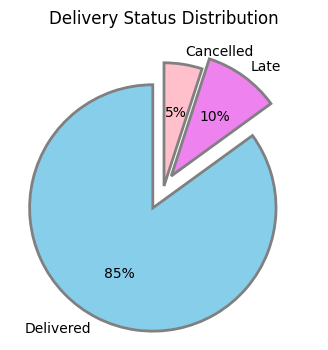

In [ ]:
plt.figure(figsize=(6,4))
df['Delivery_Status'].value_counts().plot.pie(autopct='%1.0f%%', startangle=90, explode=[0.2,0.1,0], colors=['skyblue', 'violet', 'pink'],
                                              wedgeprops = dict(edgecolor = 'grey', linewidth = 2, linestyle = 'solid'))
plt.title("Delivery Status Distribution")
plt.ylabel("")
plt.show()

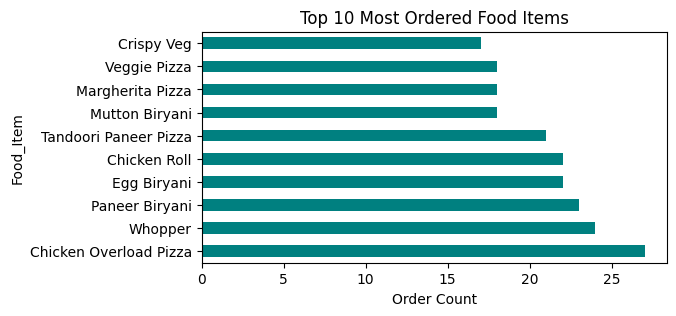

In [ ]:
plt.figure(figsize=(6,3))
df['Food_Item'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title("Top 10 Most Ordered Food Items")
plt.xlabel("Order Count")
plt.show()

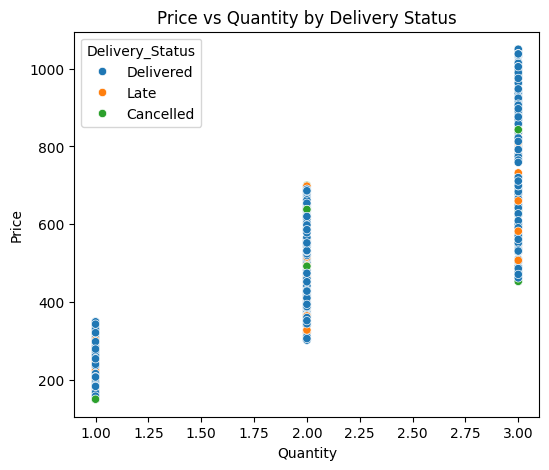

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='Quantity', y='Price', hue='Delivery_Status')
plt.title("Price vs Quantity by Delivery Status")
plt.show()

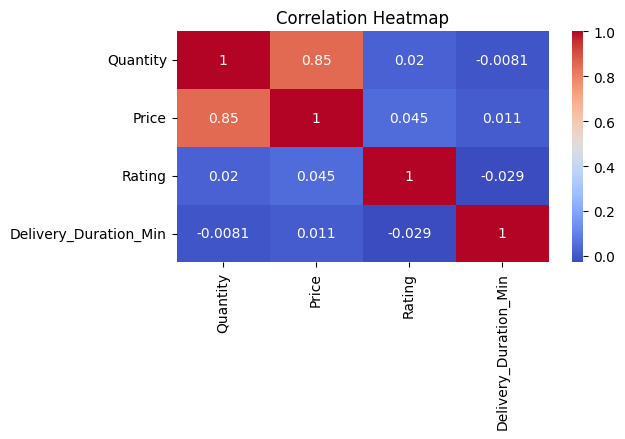

In [ ]:
plt.figure(figsize=(6,3))
sns.heatmap(df[['Quantity', 'Price', 'Rating', 'Delivery_Duration_Min']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

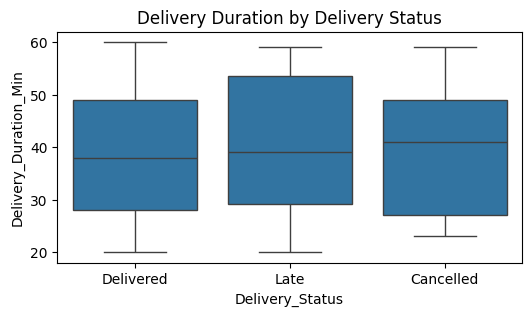

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df, x='Delivery_Status', y='Delivery_Duration_Min')
plt.title("Delivery Duration by Delivery Status")
plt.show()

<Figure size 500x300 with 0 Axes>

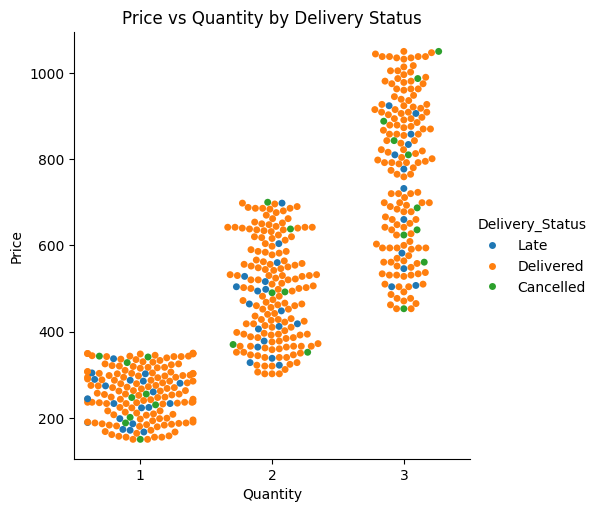

In [ ]:
plt.figure(figsize=(5,3))
sns.catplot(data=df, x='Quantity', y='Price', hue='Delivery_Status', kind = 'swarm')
plt.title("Price vs Quantity by Delivery Status")
plt.show()